>+ Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize.
>+ Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class.
>+ How to use shift, flip, brightness, and zoom image data augmentation.|

## **What we learn**
1. Image Data Augmentation
2. Sample Image
3. Image Augmentation With ImageDataGenerator
4. Horizontal and Vertical Shift Augmentation
5. Horizontal and Vertical Flip Augmentation
6. Random Rotation Augmentation
7. Random Brightness Augmentation
8. Random Zoom Augmentation

### **1. Image Data agumentation**
+ Hiệu suất của mạng nơ-ron học sâu thường được cải thiện theo lượng dữ liệu có sẵn. Tăng dữ liệu là một kỹ thuật để tạo dữ liệu đào tạo mới một cách giả tạo từ dữ liệu đào tạo hiện có.
+ Tăng dữ liệu là phưong pháp phổ biến, chúng ta tạo thêm các ảnh từ ảnh cũ bằng các phép biên đổi hình ảnh. ***Ví dụ, việc lật ngang ảnh một con mèo có thể có ý nghĩa, vì ảnh có thể được chụp từ bên trái hoặc bên phải***
+ Các thuật toán học sâu hiện đại, chẳng hạn như mạng nơ-ron tích tụ hoặc CNN, có thể tìm hiểu các tính năng bất biến đối với vị trí của chúng trong hình ảnh.
+ Việc tăng dữ liệu hình ảnh thường chỉ được áp dụng cho tập dữ liệu đào tạo chứ không áp dụng cho tập dữ liệu kiểm tra hoặc xác thực.


### **2. Sample Image and Agumentation image with ImageDataGenerator**
> ImageDataGeneratoe
+ Image shifts via the width shift range and height shift range arguments.
+ Image flips via the horizontal flip and vertical flip arguments.
+ Image rotations via the rotation range argument
+ Image brightness via the brightness range argument.
+ Image zoom via the zoom range argument.
> Dich
+  Hình ảnh thay đổi thông qua các đối số phạm vi dịch chuyển chiều rộng và phạm vi dịch chuyển chiều cao.
+  Hình ảnh lật qua đối số lật ngang và lật dọc.
+  Xoay hình ảnh thông qua đối số phạm vi xoay
+ Độ sáng của hình ảnh thông qua đối số phạm vi độ sáng.
+ Thu phóng hình ảnh thông qua đối số phạm vi thu phóng.

In [48]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10 
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [49]:
# Normalize the data. Before we need to connvert data type to float for computation.
num_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [50]:
batch_size = 256
epochs = 50000 / 256
x_train.shape[1:]

(32, 32, 3)

In [51]:
# define model
from keras import Sequential
from tensorflow import keras
from keras.layers import Dense, MaxPooling2D, Flatten, Dropout, Conv2D
model = Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape= (32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

optimize = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
            optimizer=optimize,
            metrics=['accuracy'])

### **3.Horizontal and Vertical Shift Augmentation**
+ "Shif" hình ảnh có nghĩa là di chuyển tất cả các pixel của hình ảnh theo một hướng, chẳng hạn như theo chiều ngang hoặc chiều dọc, trong khi vẫn giữ nguyên kích thước hình ảnh.
+ Điều này có nghĩa là một số pixel sẽ bị cắt ra khỏi hình ảnh và sẽ có một vùng của hình ảnh nơi các giá trị pixel mới sẽ phải được chỉ định

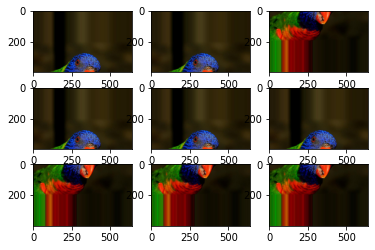

In [3]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load the image
img = load_img('/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/Image Preparagation/bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200]) ## Chieu rong
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    # show the figure
plt.show()

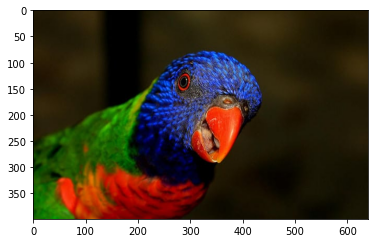

In [6]:
plt.imshow(img)

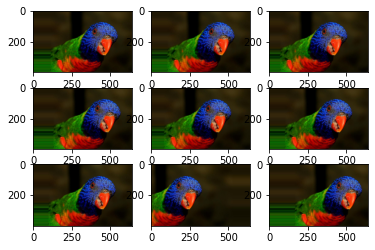

In [5]:
# dich chuyen anh theo chieu cao
datagen = ImageDataGenerator(height_shift_range=0.5) ## Chieu rong
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    # show the figure
plt.show()

### 4. Horizontal and Vertical Flip Augmentation
+ đảo ngược các hàng hoặc cột pixel trong trường hợp lật dọc hoặc lật ngang tương ứng.
+ The flip augmentation is specified by a boolean horizontal flip or vertical flip argument to the ImageDataGenerator class constructor.


> **datagen = ImageDataGenerator(horizontal_flip=True)**

### **5. Random Rotation Augmentation**
+ Việc nâng xoay sẽ xoay ngẫu nhiên hình ảnh theo chiều kim đồng hồ theo một số độ nhất định từ 0 đến 360. Việc xoay có thể sẽ xoay các pixel ra khỏi khung hình ảnh và để lại các vùng của khung không có dữ liệu pixel nào phải được điền vào.
> datagen = ImageDataGenerator(rotation_range=90) - rotate 90 degree

### **6. Random Brightness Augmentation**
+ Độ sáng của hình ảnh có thể được tăng lên bằng cách làm tối ngẫu nhiên hình ảnh, làm sáng hình ảnh hoặc cả hai.
+ Mục đích là cho phép một mô hình tổng quát hóa trên các hình ảnh được đào tạo trên các
mức độ chiếu sáng
> a brightness image augmentation, allowing the generator to randomly darken the image between 1.0 (no change) and 0.2 or 20%.
>
> datagen = ImageDataGenerator(brightness_range=[0.2,1.0])